### 신입교육세션 회귀분석 실습과 과제
by DA 22기 이해인, DA 23기 최정현

1. 실습
- diabetes 데이터를 선형회귀식을 사용해 분석해봅시다!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install matplotlib

In [ ]:
pip install statsmodels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetes_XY.csv', index_col = 0)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
#1 - formula 명시하지 않는 방법
Y = data.iloc[:, -1]
X = data.iloc[:, :-1]
X = sm.add_constant(X)

model = sm.OLS(Y, X)
res = model.fit()

print(res.summary())


                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.518
Model:                             OLS   Adj. R-squared:                  0.507
Method:                  Least Squares   F-statistic:                     46.27
Date:                 Mon, 22 Jan 2024   Prob (F-statistic):           3.83e-62
Time:                         12:51:30   Log-Likelihood:                -2386.0
No. Observations:                  442   AIC:                             4794.
Df Residuals:                      431   BIC:                             4839.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.06

In [5]:
#2 - R처럼 formula 사용하기 (다중회귀에서 변수 변경할 때 보다 편리함)
form_mod = ols('disease_progression ~ age + sex + bmi + bp + s1 + s2 + s3 + s4 + s5 + s6', data = data)
res2 = form_mod.fit()

print(res2.summary())

                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.518
Model:                             OLS   Adj. R-squared:                  0.507
Method:                  Least Squares   F-statistic:                     46.27
Date:                 Mon, 22 Jan 2024   Prob (F-statistic):           3.83e-62
Time:                         12:51:38   Log-Likelihood:                -2386.0
No. Observations:                  442   AIC:                             4794.
Df Residuals:                      431   BIC:                             4839.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.06

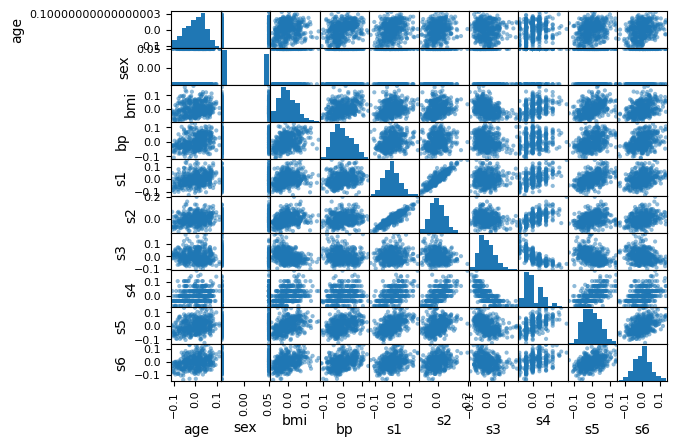

In [6]:
# 산점도 행렬 그리기 - 다중공선성 확인
X_ = X.iloc[:, 1:]
pd.plotting.scatter_matrix(X_)
plt.show()

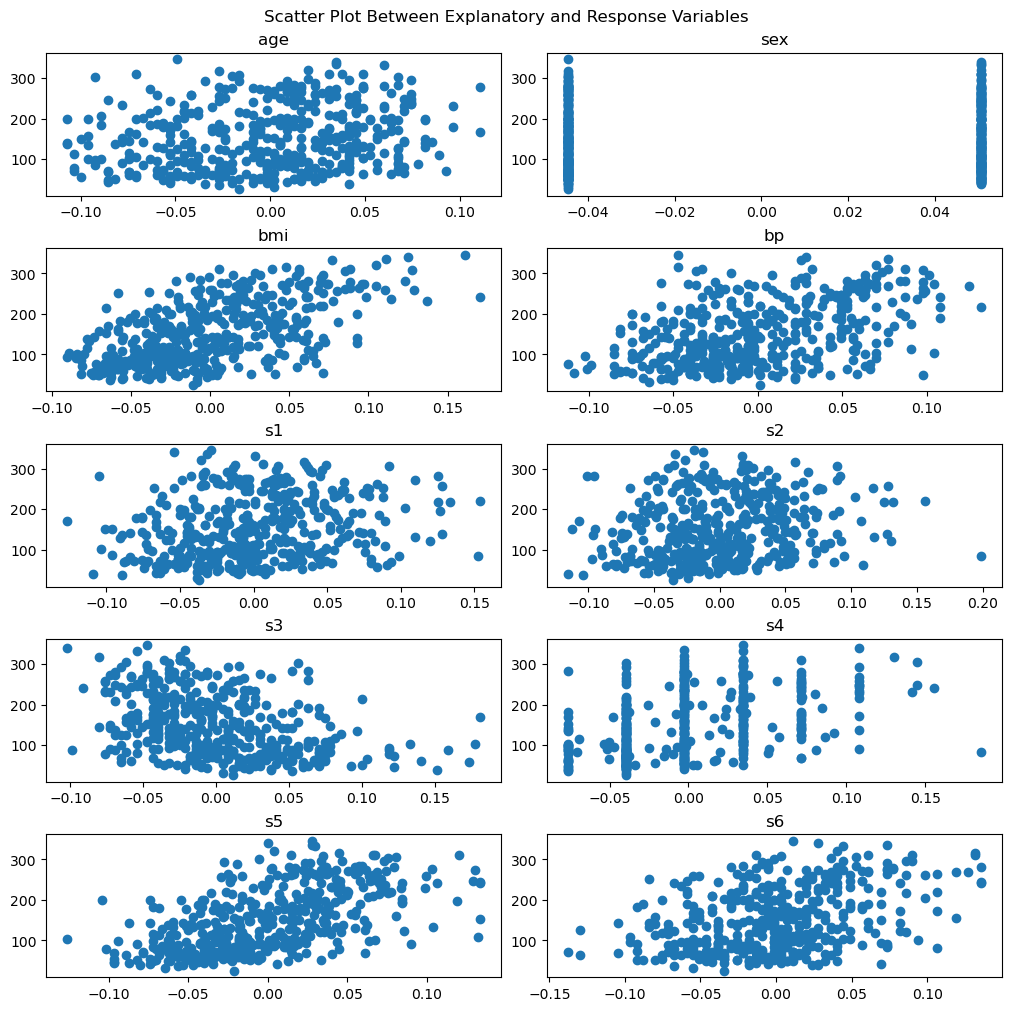

In [7]:
# 일반 산점도 한꺼번에 그리기

def draw_scatter(ii, jj, title):
    X_cols = np.array(X_.columns).reshape(ii,-1)
    fig, axs = plt.subplots(ii,jj, figsize = (10,10), layout = 'constrained')
    fig.suptitle(title)
    axs_list = [(i,j) for i in range(0,ii) for j in range(0,jj)]
    for ax in axs_list:
        axs[ax].set_title(X_cols[ax])
        axs[ax].scatter(X_[X_cols[ax]], Y)
    plt.show()

draw_scatter(5, 2, "Scatter Plot Between Explanatory and Response Variables")

eval_env: 1


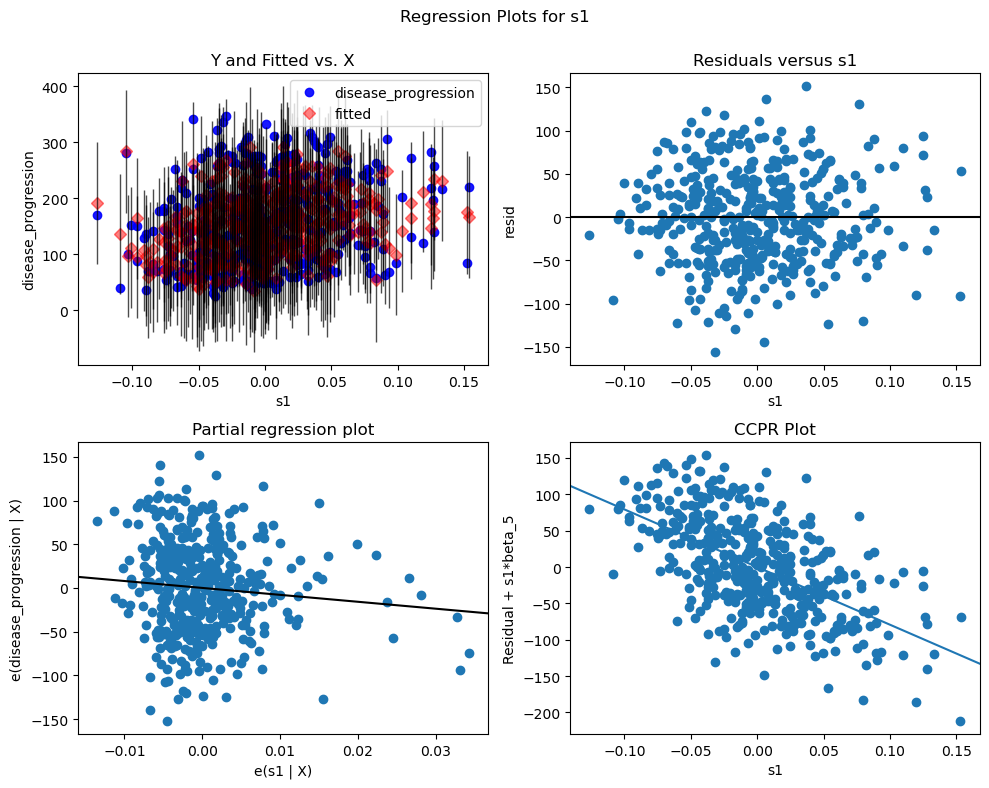

In [8]:
#잔차도 + 다른 여러 그림 그리기
fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod.fit(), 's1', fig=fig)

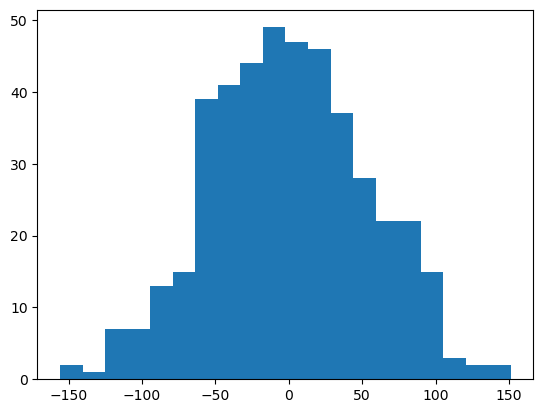

In [9]:
#잔차 히스토그램
residuals = Y - res.predict()
plt.hist(residuals, bins = 20)
plt.show()

In [10]:
#다중공선성 확인
vif = pd.DataFrame()
vif['VIF Factors'] = [variance_inflation_factor(X_, i)for i in range(X_.shape[1])]
vif['features'] = X_.columns
vif['is_vif'] = vif['VIF Factors'] > 10
vif = vif.sort_values("VIF Factors").reset_index(drop=True)
vif

,VIF Factors,features,is_vif
0,1.217307,age,False
1,1.278071,sex,False
2,1.459428,bp,False
3,1.484623,s6,False
4,1.509437,bmi,False
5,8.890986,s4,False
6,10.075967,s5,True
7,15.402156,s3,True
8,39.193370,s2,True
9,59.202510,s1,True


2. 과제

- 'Student_Performance.csv'를 이용해 다중선형회귀분석을 진행하세요!


In [28]:
# 데이터 불러오기
df = pd.read_csv('Student_Performance.csv', index_col = 0)
df.head()

,Study_Hours,Prev_Scores,Sleep_Hours,Sample_Practice,PI,Extracurriculars
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


2.1. 반응변수를 PI로 하고, 설명변수들을 그 외 모든 변수로 설정한 다중선형회귀분석을 진행하고 summary를 print하세요.

In [39]:
Y = df['PI']
X = df.loc[:, df.columns != 'PI']

X = sm.add_constant(X)

model = sm.OLS(Y,X)
res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:35:30   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.0756      0.127  

2.2. 반응변수를 PI로 하고, 설명변수들을 Study_Hours로 설정한 단순선형회귀분석을 진행하고 summary를 print하세요.

In [45]:
form = ols(f'PI ~ Study_Hours', data = df )
result = form.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1623.
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:47:25   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9998   BIC:                         8.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      41.3792      0.387    106.890      

2.3. (2.1)과 (2.2)의 분석을 비교하고 Study_Hours와 PI의 관계를 짧게, 자유롭게 설명해보세요.

* (2.1) 다중 선형회귀 vs (2.2) 단순 선형회귀
    - 계산된 F-statistics를 통해 두 모델 모두 유의미한 회귀식을 가지고 있다고 볼 수 있음. 더불어, p-value를 봤을 때, 다중 선형회귀와 단순 선형회귀 모두 각 독립변수가 통계적으로 유의하다는 것을 알 수 있음. 단, 모델에 따라 다음과 같은 차이가 존재함.

    - 결정 계수 (R-squared) : 다중 선형회귀는 타겟을 제외한 나머지 데이터를 모두 사용하고 있기 때문에 1에 가까운 값을 갖지만, Study_Hours만 사용한 단순 선형 회귀에서는 결정 계수 값이 높지 않음. 
    - 다중공선성 : 다중 선형회귀 모델의 Cond.No 값을 확인해보면 452로 다중공선성이 강하다고 판단 가능함. 

* Study_Hours - PI (target)
    - 두 모델의 coef 값을 확인해봤을 때, Study_Hours의 변화는 PI 값이 2.8 단위 변화하게 하며, 이는 p-value를 통해 매우 유의하다고 볼 수 있음. 
    - 실제로 단순선형회귀 그래프를 그려보면 Study_Hours의 증가에 따라 추세선과 데이터 값들이 우상향 하고 있음을 확인 가능함

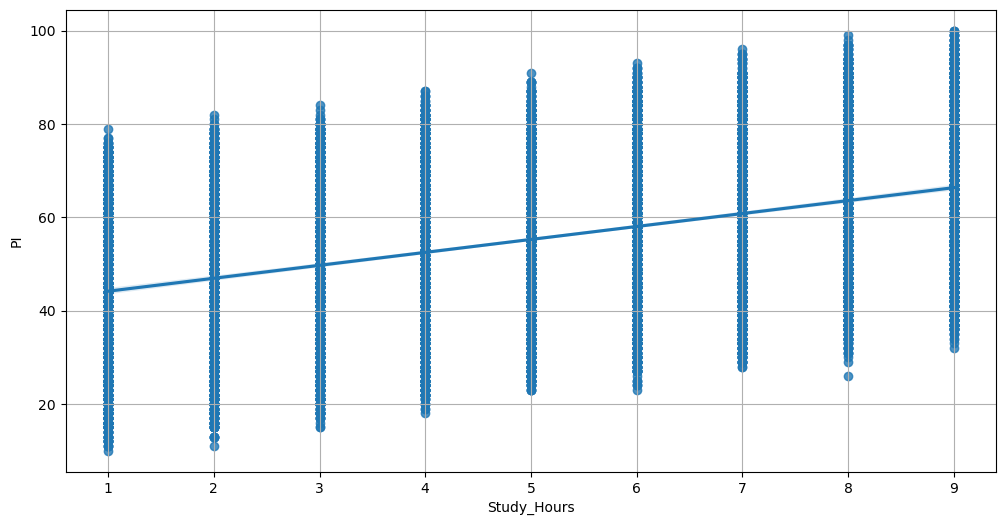

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.regplot(x='Study_Hours', y = 'PI', data = df)
plt.grid()
plt.show()

[Optional!] 2.4. 자유롭게 산점도, 잔차도 등 여러 그림과 추가로 진행하고 싶은 진단들을 진행한 후 이 변수들을 이런 선형 모형의 가정에 만족하는 지 설명해주세요.

[<b> 사후 잔차도 분석 ]

#### 1) 선형성

- 잔차와 예측값 간에 특별한 패턴이 보이지 않기 때문에, 선형성 가정을 만족한다고 볼 수 있음. (아래 잔차 - 예측값 scatterplot 참고)

#### 2) 등분산성

- 분산이 예측값에 관계 없이 일정한 상수로 유지되고 있기 때문에 등분산성 가정도 만족

Text(0, 0.5, 'Residuals')

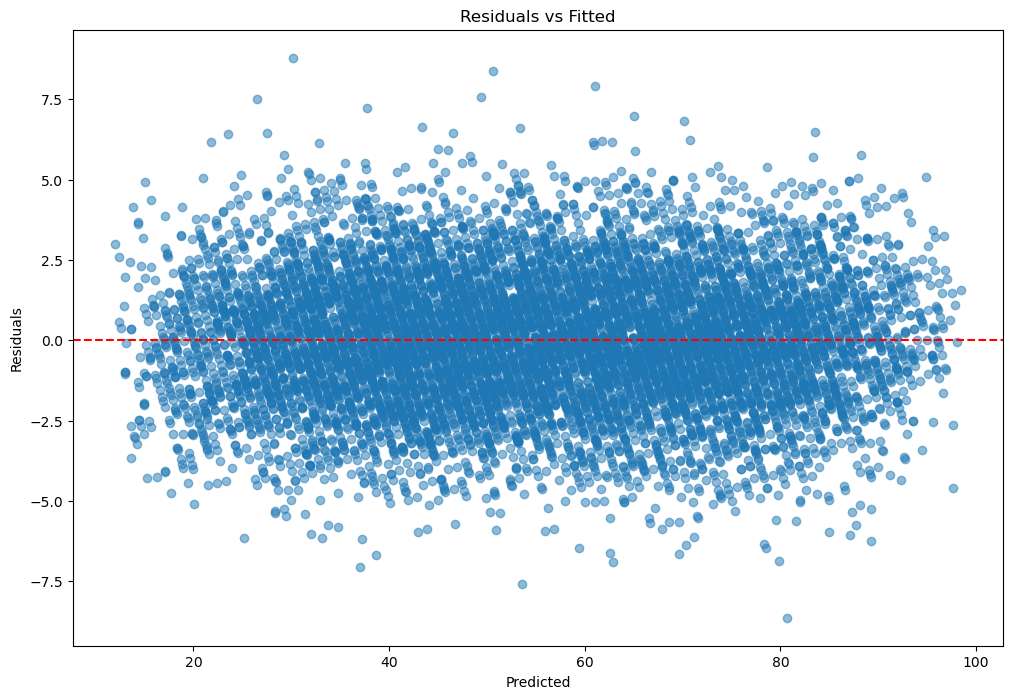

In [61]:
#모델 정의 
Y = df['PI']
X = df.loc[:, df.columns != 'PI']

X = sm.add_constant(X)

model = sm.OLS(Y,X)
res = model.fit()

#잔차 구하기
residuals = res.resid

# 잔차 vs 예측값 산점도 그리기
plt.figure(figsize = (12,8))
plt.scatter(res.predict(), residuals, alpha = 0.5)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.title('Residuals vs Fitted')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

#### 3) 정규성
- 아래 Q-Q Plot 상의 점들이 45도 각도의 선에 가깝게 배열 되어 있으므로 잔차가 정규 분포를 따르고 있다고 생각할 수 있음. 

Text(0.5, 1.0, 'Q-Q Plot')

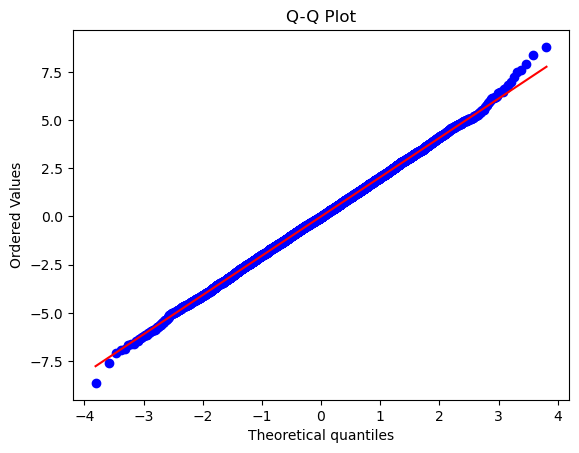

In [68]:
from spicy import stats

stats.probplot(residuals, dist = 'norm', plot = plt)
plt.title('Q-Q Plot')

#### 4) 독립성
- 이전의 OLS Summary 중 Durbin-Watson 통계치를 확인해보면 2.001임. Durbin-Watson 통계치는 2에 가까울수록 잔차 간의 자기 상관성이 존재하지 않는다는 것을 의미하기 때문에, 분석은 독립성을 만족하고 있음.

In [71]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:45:37   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.0756      0.127  

[ <b> 다중공선성 ]

In [70]:
#다중공선성 확인
Y = df['PI']
X = df.loc[:, df.columns != 'PI']

vif = pd.DataFrame()
vif['VIF Factors'] = [variance_inflation_factor(X, i)for i in range(X.shape[1])]
vif['features'] = X.columns
vif['is_vif'] = vif['VIF Factors'] > 10
vif = vif.sort_values("VIF Factors").reset_index(drop=True)
vif

,VIF Factors,features,is_vif
0,1.928235,Extracurriculars,False
1,3.350481,Sample_Practice,False
2,4.263244,Study_Hours,False
3,9.833594,Sleep_Hours,False
4,10.088586,Prev_Scores,True


위의 VIF 값을 확인해봤을 때, Prev_Scores의 값이 10을 초과하고 있으므로, 높은 다중 공선성을 보인다고 해석할 수 있음. 